In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_test = pd.read_csv("../data/test.csv")
df_store = pd.read_csv("../data/store.csv")
df_train = pd.read_csv("../data/train.csv")

C:\Users\wasihunt\AppData\Local\Temp\ipykernel_14136\1736236737.py:3: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv("../data/train.csv")


In [3]:
df_test.sample(10)

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
40823,40824,765,6,2015-08-01,1.0,0,0,0
4756,4757,619,6,2015-09-12,1.0,0,0,0
24045,24046,102,4,2015-08-20,1.0,1,0,0
28537,28538,377,6,2015-08-15,1.0,0,0,0
40324,40325,124,6,2015-08-01,1.0,0,0,0
13473,13474,820,3,2015-09-02,1.0,1,0,1
24541,24542,740,4,2015-08-20,1.0,1,0,1
20053,20054,475,2,2015-08-25,1.0,0,0,0
38468,38469,1051,2,2015-08-04,1.0,1,0,1
36474,36475,676,4,2015-08-06,1.0,1,0,1


In [4]:
print(f"Test data minimum date: {df_test['Date'].min()}")
print(f"Test data maximum data: {df_test['Date'].max()}")

Test data minimum date: 2015-08-01
Test data maximum data: 2015-09-17


In [5]:
df_test.isnull().sum()

Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64

In [6]:
df_test['Open'] =df_test['Open'].fillna(df_test['Open'].mode()[0])

In [7]:
df_test.isnull().sum()

Id               0
Store            0
DayOfWeek        0
Date             0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [8]:
df_test.shape

(41088, 8)

In [9]:
df_store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [10]:
df_store['Promo2SinceWeek'] = np.where(df_store['Promo2']== 0, 'UNKNOWN',df_store['Promo2SinceWeek'])
df_store['Promo2SinceYear'] = np.where(df_store['Promo2']== 0, 'UNKNOWN',df_store['Promo2SinceYear'])
df_store['PromoInterval'] = np.where(df_store['Promo2']== 0, 'UNKNOWN',df_store['PromoInterval'])
df_store['CompetitionDistance'] = df_store['CompetitionDistance'].fillna(0)
df_store['CompetitionOpenSinceMonth'] = df_store['CompetitionOpenSinceMonth'].fillna(0)
df_store['CompetitionOpenSinceYear'] = df_store['CompetitionOpenSinceYear'].fillna(0)


In [11]:
df_store

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,UNKNOWN,UNKNOWN,UNKNOWN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,UNKNOWN,UNKNOWN,UNKNOWN
4,5,a,a,29910.0,4.0,2015.0,0,UNKNOWN,UNKNOWN,UNKNOWN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,UNKNOWN,UNKNOWN,UNKNOWN
1112,1113,a,c,9260.0,0.0,0.0,0,UNKNOWN,UNKNOWN,UNKNOWN
1113,1114,a,c,870.0,0.0,0.0,0,UNKNOWN,UNKNOWN,UNKNOWN


In [12]:
df_store['Promo2SinceWeek'].isnull().sum()

np.int64(0)

In [13]:
df_store.shape

(1115, 10)

In [14]:
df_store.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [15]:
df_train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [16]:
df_train.shape

(1017209, 9)

In [17]:
print(f"Test data minimum date: {df_train['Date'].min()}")
print(f"Test data maximum data: {df_train['Date'].max()}")

Test data minimum date: 2013-01-01
Test data maximum data: 2015-07-31


In [18]:
df_train.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [19]:
df_test_merged = pd.merge(df_store, df_test, on='Store')
df_test_merged.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Id,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,c,a,1270.0,9.0,2008.0,0,UNKNOWN,UNKNOWN,UNKNOWN,1,4,2015-09-17,1.0,1,0,0
1,1,c,a,1270.0,9.0,2008.0,0,UNKNOWN,UNKNOWN,UNKNOWN,857,3,2015-09-16,1.0,1,0,0
2,1,c,a,1270.0,9.0,2008.0,0,UNKNOWN,UNKNOWN,UNKNOWN,1713,2,2015-09-15,1.0,1,0,0
3,1,c,a,1270.0,9.0,2008.0,0,UNKNOWN,UNKNOWN,UNKNOWN,2569,1,2015-09-14,1.0,1,0,0
4,1,c,a,1270.0,9.0,2008.0,0,UNKNOWN,UNKNOWN,UNKNOWN,3425,7,2015-09-13,0.0,0,0,0


##### ***Test Distribution Analysis***

<Axes: xlabel='SchoolHoliday', ylabel='count'>

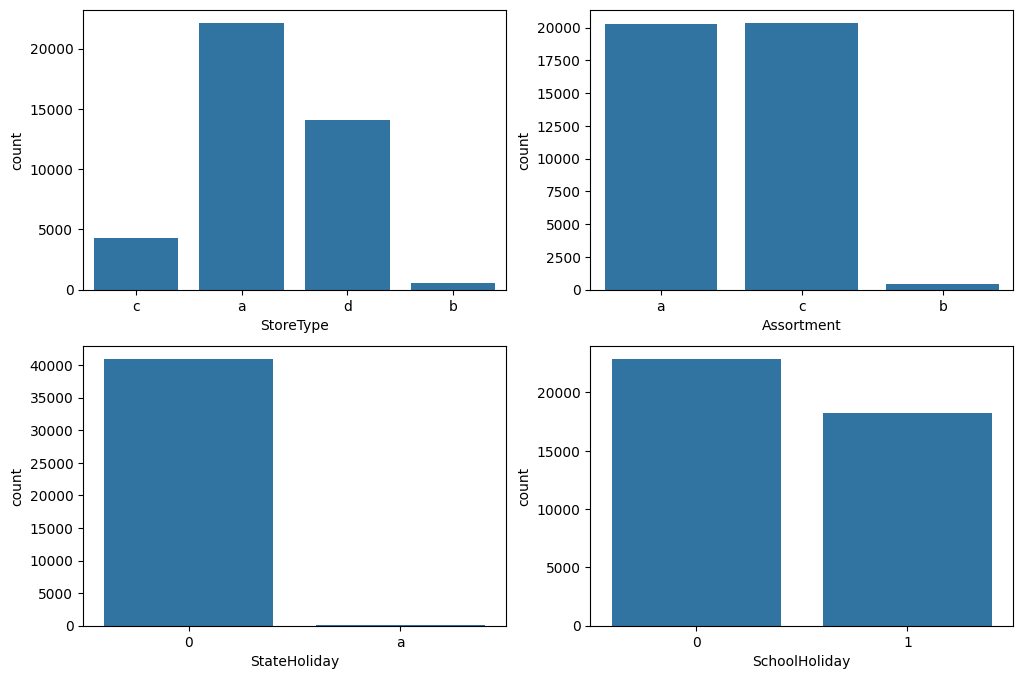

In [20]:
fig, ax = plt.subplots(2,2, figsize=(12,8))
sns.countplot(data=df_test_merged, x='StoreType', ax=ax[0][0])
sns.countplot(data=df_test_merged, x='Assortment', ax=ax[0][1])
sns.countplot(data=df_test_merged, x='StateHoliday', ax=ax[1][0])
sns.countplot(data=df_test_merged, x='SchoolHoliday', ax=ax[1][1])

<Axes: xlabel='Open', ylabel='count'>

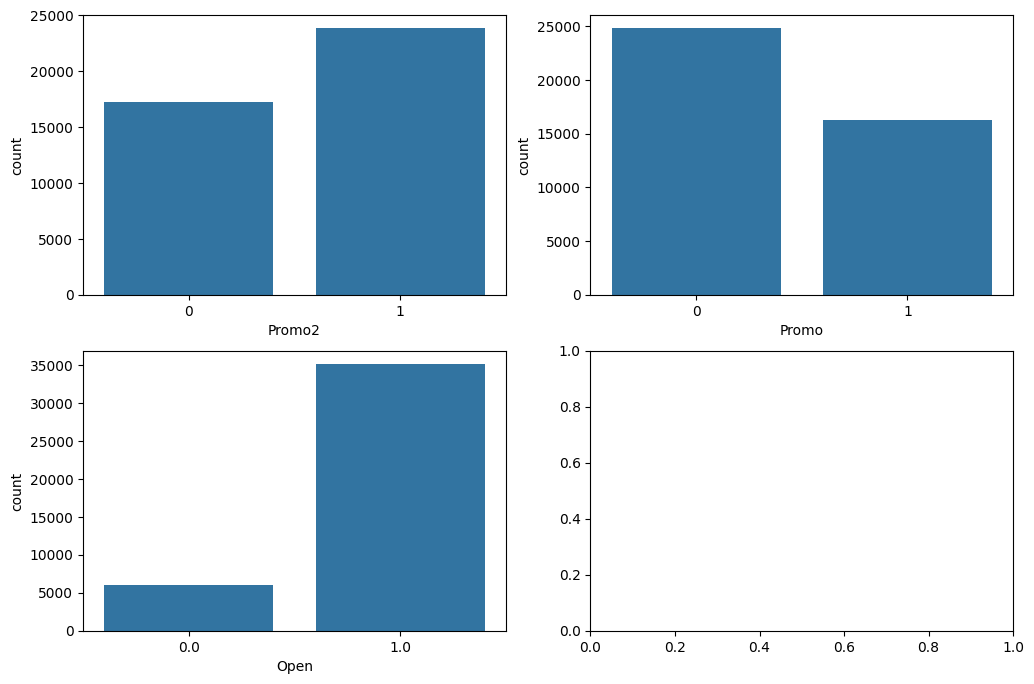

In [21]:
fig, ax = plt.subplots(2,2, figsize=(12,8))
sns.countplot(data=df_test_merged, x='Promo2', ax=ax[0][0])
sns.countplot(data=df_test_merged, x='Promo', ax=ax[0][1])
sns.countplot(data=df_test_merged, x='Open', ax=ax[1][0])

##### ***Training Data Analysis***

In [22]:
df_train_merged = pd.merge(df_store, df_train, on='Store')
df_train_merged.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,c,a,1270.0,9.0,2008.0,0,UNKNOWN,UNKNOWN,UNKNOWN,5,2015-07-31,5263,555,1,1,0,1
1,1,c,a,1270.0,9.0,2008.0,0,UNKNOWN,UNKNOWN,UNKNOWN,4,2015-07-30,5020,546,1,1,0,1
2,1,c,a,1270.0,9.0,2008.0,0,UNKNOWN,UNKNOWN,UNKNOWN,3,2015-07-29,4782,523,1,1,0,1
3,1,c,a,1270.0,9.0,2008.0,0,UNKNOWN,UNKNOWN,UNKNOWN,2,2015-07-28,5011,560,1,1,0,1
4,1,c,a,1270.0,9.0,2008.0,0,UNKNOWN,UNKNOWN,UNKNOWN,1,2015-07-27,6102,612,1,1,0,1


In [23]:
df_train_merged.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
dtype: int64

<Axes: xlabel='SchoolHoliday', ylabel='count'>

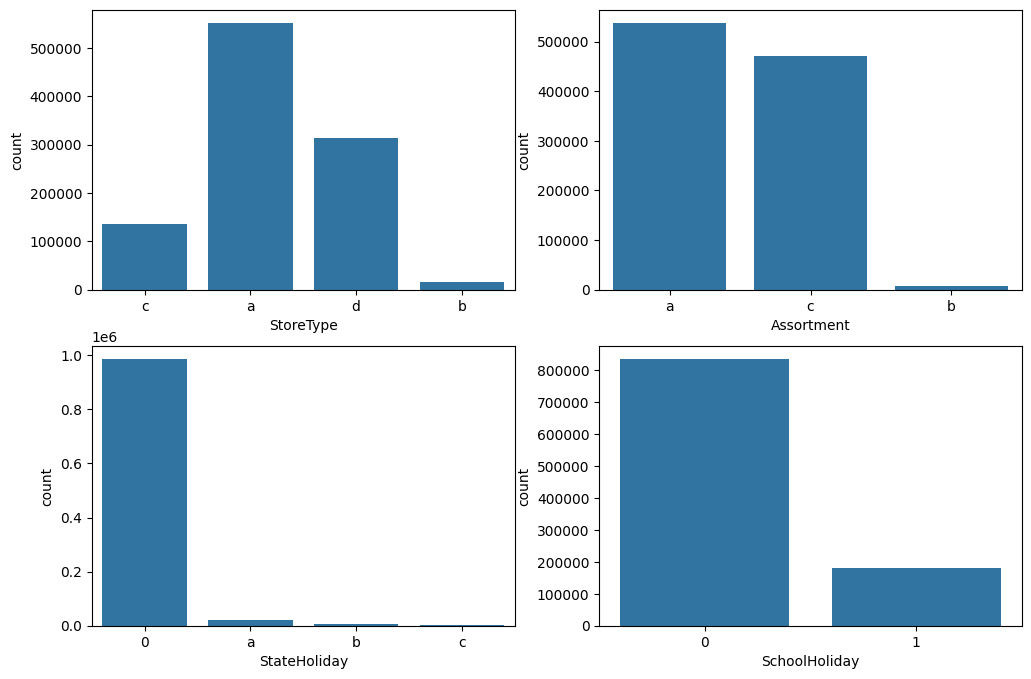

In [24]:
## Distribution Plot 
fig, ax = plt.subplots(2,2, figsize=(12,8))
sns.countplot(data=df_train_merged, x='StoreType', ax=ax[0][0])
sns.countplot(data=df_train_merged, x='Assortment', ax=ax[0][1])
sns.countplot(data=df_train_merged, x='StateHoliday', ax=ax[1][0])
sns.countplot(data=df_train_merged, x='SchoolHoliday', ax=ax[1][1])

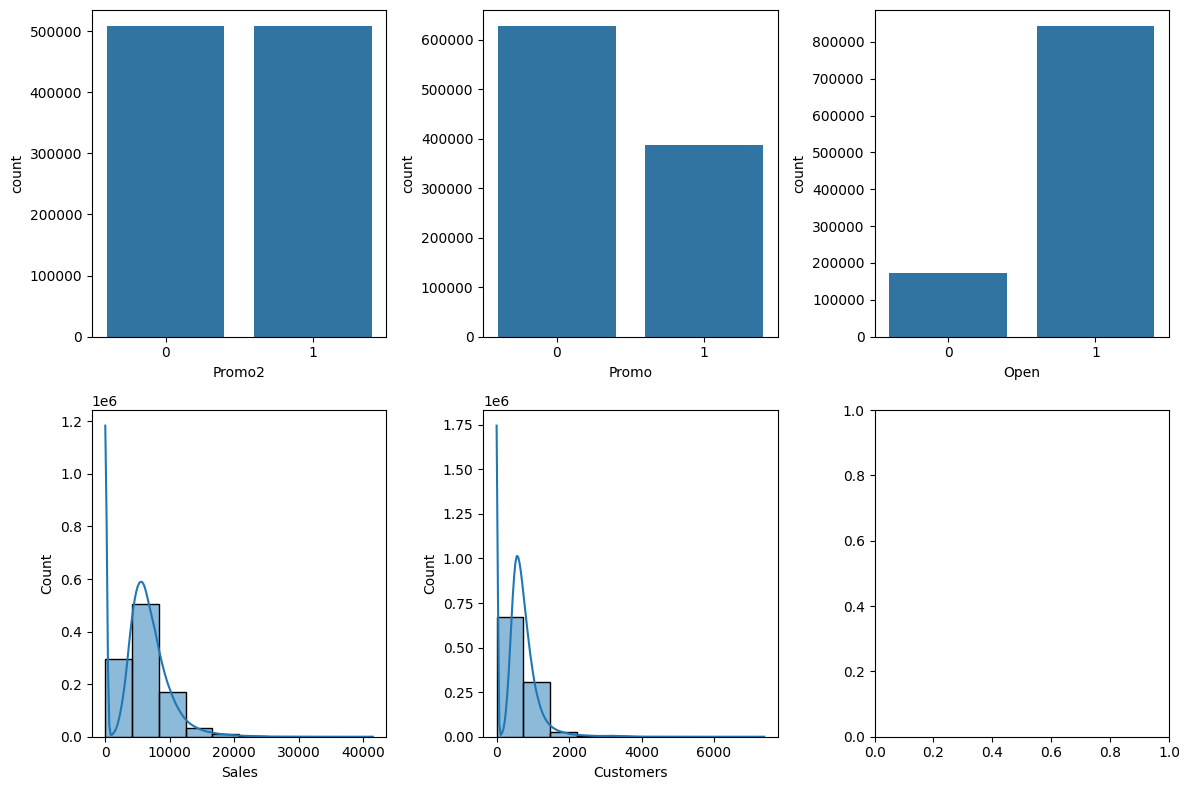

In [25]:
## Distribution Analysis
fig, ax = plt.subplots(2,3, figsize=(12,8))
sns.countplot(data=df_train_merged, x='Promo2', ax=ax[0][0])
sns.countplot(data=df_train_merged, x='Promo', ax=ax[0][1])
sns.countplot(data=df_train_merged, x='Open', ax=ax[0][2])
sns.histplot(data=df_train_merged, x='Sales', bins=10, kde=True, ax=ax[1][0])
sns.histplot(data=df_train_merged, x='Customers', bins=10, kde=True, ax=ax[1][1])

plt.tight_layout()


<Axes: xlabel='Sales'>

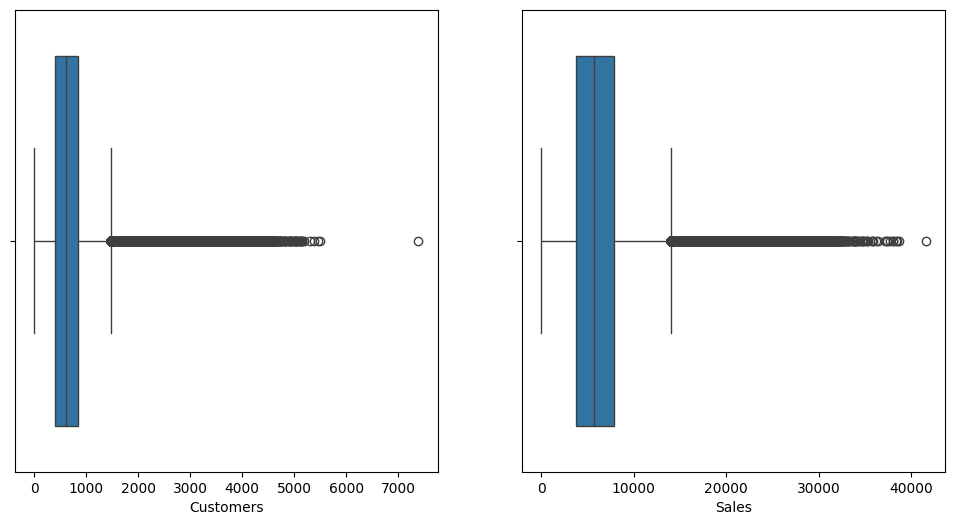

In [26]:
## Let's Check for outliers in Sales and Customers column since they are the only useful columns

fig, ax = plt.subplots(1,2, figsize=(12,6))
sns.boxplot(data=df_train_merged, x=df_train_merged['Customers'],ax=ax[0])
sns.boxplot(data=df_train_merged, x=df_train_merged['Sales'],ax=ax[1])

In [27]:
### Handle Outliers

def handle_outliers(df):
    columns = ['Sales', 'Customers']
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5*IQR
        upper_bound = Q3 + 1.5*IQR

        df[col] = np.where(((df[col] <= lower_bound) | (df[col] >= upper_bound)), df[col].mean(), df[col])

    return df

In [28]:
handle_outliers(df_train_merged)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,c,a,1270.0,9.0,2008.0,0,UNKNOWN,UNKNOWN,UNKNOWN,5,2015-07-31,5263.0,555.0,1,1,0,1
1,1,c,a,1270.0,9.0,2008.0,0,UNKNOWN,UNKNOWN,UNKNOWN,4,2015-07-30,5020.0,546.0,1,1,0,1
2,1,c,a,1270.0,9.0,2008.0,0,UNKNOWN,UNKNOWN,UNKNOWN,3,2015-07-29,4782.0,523.0,1,1,0,1
3,1,c,a,1270.0,9.0,2008.0,0,UNKNOWN,UNKNOWN,UNKNOWN,2,2015-07-28,5011.0,560.0,1,1,0,1
4,1,c,a,1270.0,9.0,2008.0,0,UNKNOWN,UNKNOWN,UNKNOWN,1,2015-07-27,6102.0,612.0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",6,2013-01-05,4771.0,339.0,1,0,0,1
1017205,1115,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",5,2013-01-04,4540.0,326.0,1,0,0,1
1017206,1115,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",4,2013-01-03,4297.0,300.0,1,0,0,1
1017207,1115,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",3,2013-01-02,3697.0,305.0,1,0,0,1


<Axes: xlabel='Sales'>

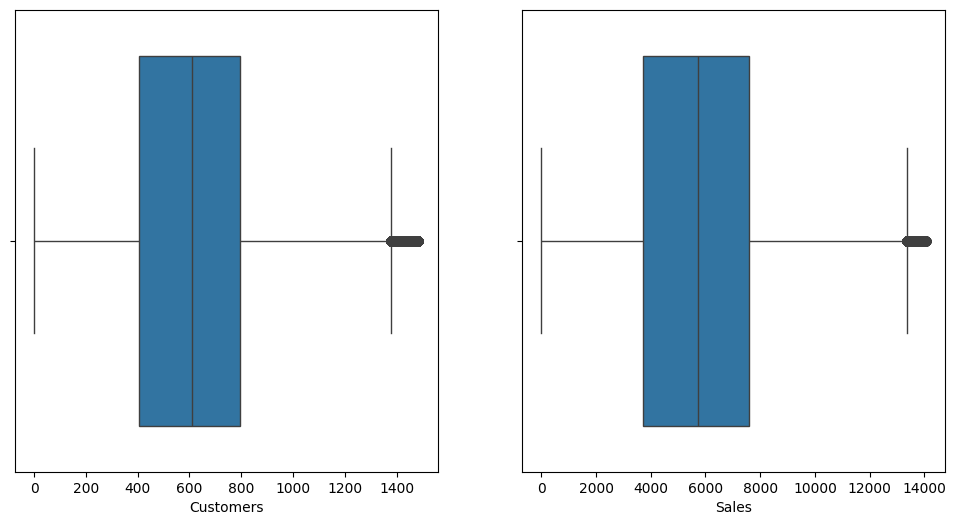

In [29]:
## Let's Check for outliers in Sales and Customers column since they are the only useful columns

fig, ax = plt.subplots(1,2, figsize=(12,6))
sns.boxplot(data=df_train_merged, x=df_train_merged['Customers'],ax=ax[0])
sns.boxplot(data=df_train_merged, x=df_train_merged['Sales'],ax=ax[1])

<Axes: xlabel='Promo', ylabel='Sales'>

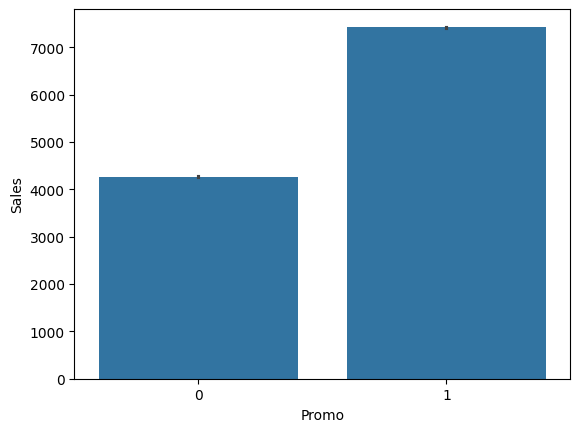

In [30]:
## Relationship between Sales and Promo
sns.barplot(data=df_train_merged, y='Sales', x='Promo')

<Axes: xlabel='Promo2', ylabel='Sales'>

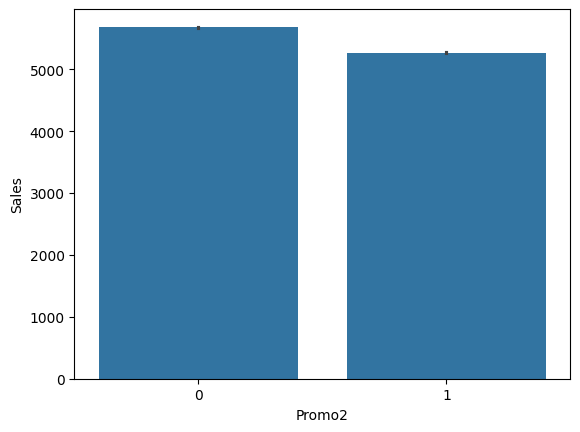

In [31]:
## Relationship between Sales and Promo
sns.barplot(data=df_train_merged, y='Sales', x='Promo2')

<Axes: xlabel='Assortment', ylabel='Sales'>

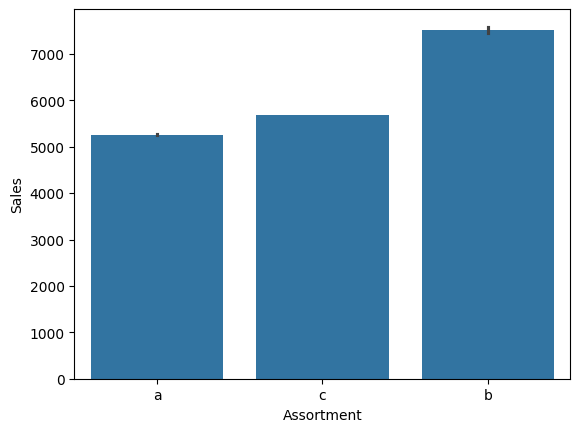

In [32]:
## Relationship between Sales and Promo
sns.barplot(data=df_train_merged, y='Sales', x='Assortment')

<Axes: xlabel='StateHoliday', ylabel='Sales'>

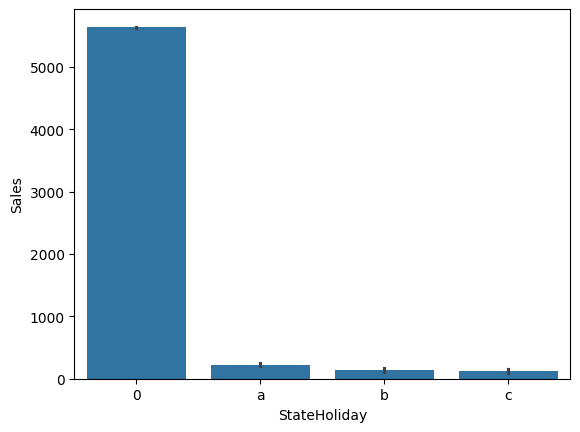

In [33]:
## Relationship between Sales and Promo
sns.barplot(data=df_train_merged, y='Sales', x='StateHoliday')

<Axes: xlabel='SchoolHoliday', ylabel='Sales'>

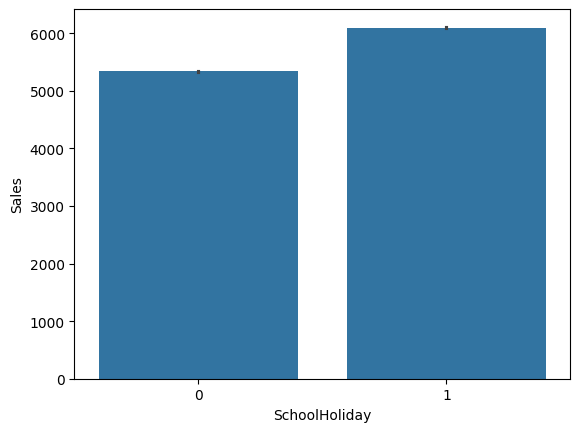

In [34]:
## Relationship between Sales and Promo
sns.barplot(data=df_train_merged, y='Sales', x='SchoolHoliday')

<Axes: xlabel='DayOfWeek', ylabel='Sales'>

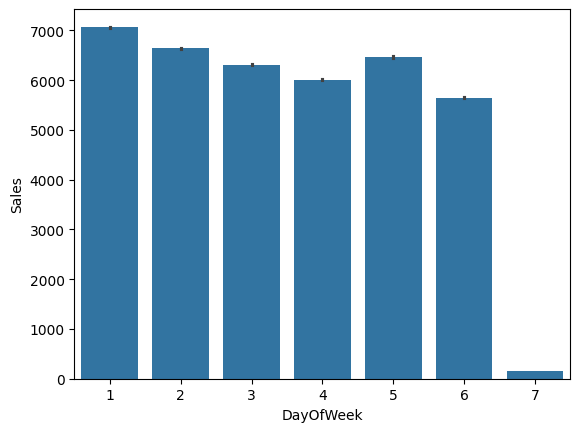

In [35]:
## Relationship between Sales and Promo
sns.barplot(data=df_train_merged, y='Sales', x='DayOfWeek')

<Axes: xlabel='StoreType', ylabel='Sales'>

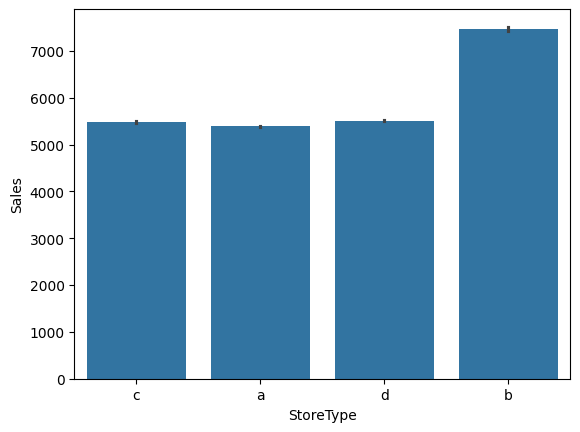

In [36]:
## Relationship between Sales and Promo
sns.barplot(data=df_train_merged, y='Sales', x='StoreType')

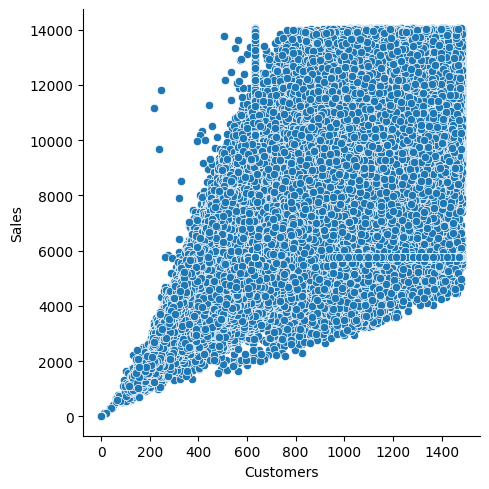

In [37]:
## Relationship between Sales and Promo
sns.relplot(data=df_train_merged, y='Sales', x='Customers')

<Axes: >

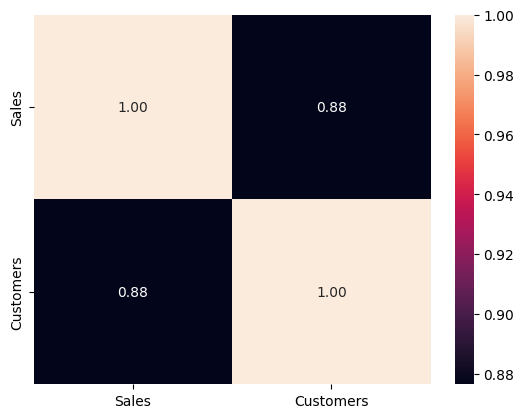

In [38]:
sns.heatmap(df_train_merged[['Sales','Customers']].corr(), annot=True, fmt=".2f")

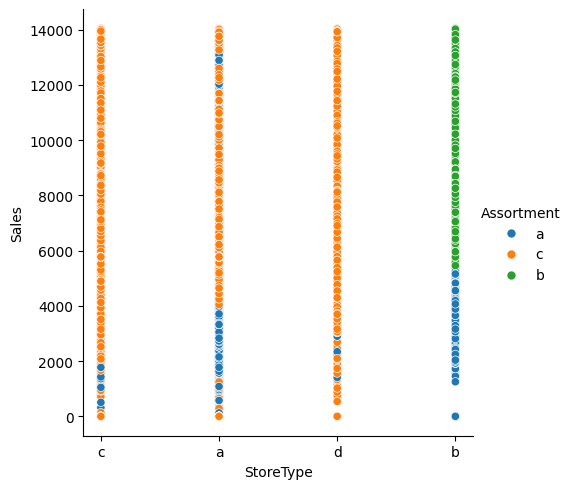

In [39]:
## Relationship between Sales and Promo
sns.relplot(data=df_train_merged, y='Sales', x='StoreType', hue='Assortment')

In [40]:
df_train_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   StoreType                  1017209 non-null  object 
 2   Assortment                 1017209 non-null  object 
 3   CompetitionDistance        1017209 non-null  float64
 4   CompetitionOpenSinceMonth  1017209 non-null  float64
 5   CompetitionOpenSinceYear   1017209 non-null  float64
 6   Promo2                     1017209 non-null  int64  
 7   Promo2SinceWeek            1017209 non-null  object 
 8   Promo2SinceYear            1017209 non-null  object 
 9   PromoInterval              1017209 non-null  object 
 10  DayOfWeek                  1017209 non-null  int64  
 11  Date                       1017209 non-null  object 
 12  Sales                      1017209 non-null  float64
 13  Customers   

In [41]:
df_train_merged = df_train_merged.convert_dtypes()

In [42]:
df_train_merged['Date'] = pd.to_datetime(df_train_merged['Date'])

In [43]:
df_train_merged.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,c,a,1270,9,2008,0,UNKNOWN,UNKNOWN,UNKNOWN,5,2015-07-31,5263.0,555.0,1,1,0,1
1,1,c,a,1270,9,2008,0,UNKNOWN,UNKNOWN,UNKNOWN,4,2015-07-30,5020.0,546.0,1,1,0,1
2,1,c,a,1270,9,2008,0,UNKNOWN,UNKNOWN,UNKNOWN,3,2015-07-29,4782.0,523.0,1,1,0,1
3,1,c,a,1270,9,2008,0,UNKNOWN,UNKNOWN,UNKNOWN,2,2015-07-28,5011.0,560.0,1,1,0,1
4,1,c,a,1270,9,2008,0,UNKNOWN,UNKNOWN,UNKNOWN,1,2015-07-27,6102.0,612.0,1,1,0,1


In [44]:
# Define periods
holiday_date = df_train_merged[df_train_merged['StateHoliday'] == 'a']['Date'].min()
df_train_merged['Period'] = pd.cut(
    (df_train_merged['Date'] - holiday_date).dt.days,
    bins=[-float('inf'), -1, 0, 7],
    labels=['Before Holiday', 'During Holiday', 'After Holiday']
)

# Visualize sales behavior
plt.figure(figsize=(10, 6))
plt.bar(period_sales['Period'], period_sales['sum'], color=['blue', 'orange', 'green'])
plt.title('Sales Behavior Before, During, and After Holiday')
plt.ylabel('Total Sales')
plt.xlabel('Period')
plt.show()

NameError: name 'period_sales' is not defined

<Figure size 1000x600 with 0 Axes>

In [45]:
df_promo_grouped = df_train_merged.groupby('Promo').agg({'Sales':'sum', 'Customers':'sum'}).reset_index()
df_promo_grouped

,Promo,Sales,Customers
0,0,2685619715.025098,300056805.191808
1,1,2882214719.621627,289098715.020434


Text(0.5, 1.0, 'Sales Distribution during Promo vs Non-Promo')

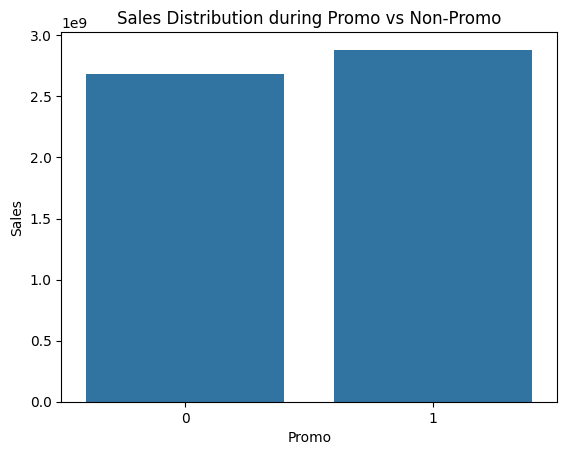

In [46]:
sns.barplot(x='Promo', y='Sales', data=df_promo_grouped)
plt.title('Sales Distribution during Promo vs Non-Promo')

Text(0.5, 1.0, 'Customer Distribution during Promo vs Non-Promo')

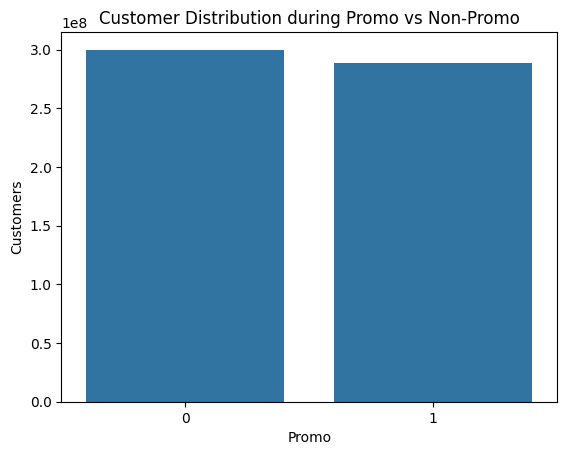

In [47]:
sns.barplot(x='Promo', y='Customers', data=df_promo_grouped)
plt.title('Customer Distribution during Promo vs Non-Promo')

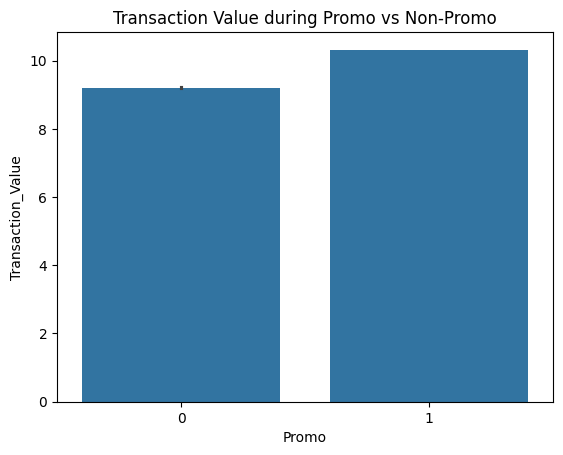

In [48]:
df_train_merged['Transaction_Value'] = df_train_merged['Sales'] / df_train_merged['Customers']
sns.barplot(x='Promo', y='Transaction_Value', data=df_train_merged)
plt.title('Transaction Value during Promo vs Non-Promo')
plt.show()

In [50]:
weekday_open = df_train_merged[df_train_merged['Open'] == 1].groupby('Store').size()
weekday_open.min()

np.int64(592)

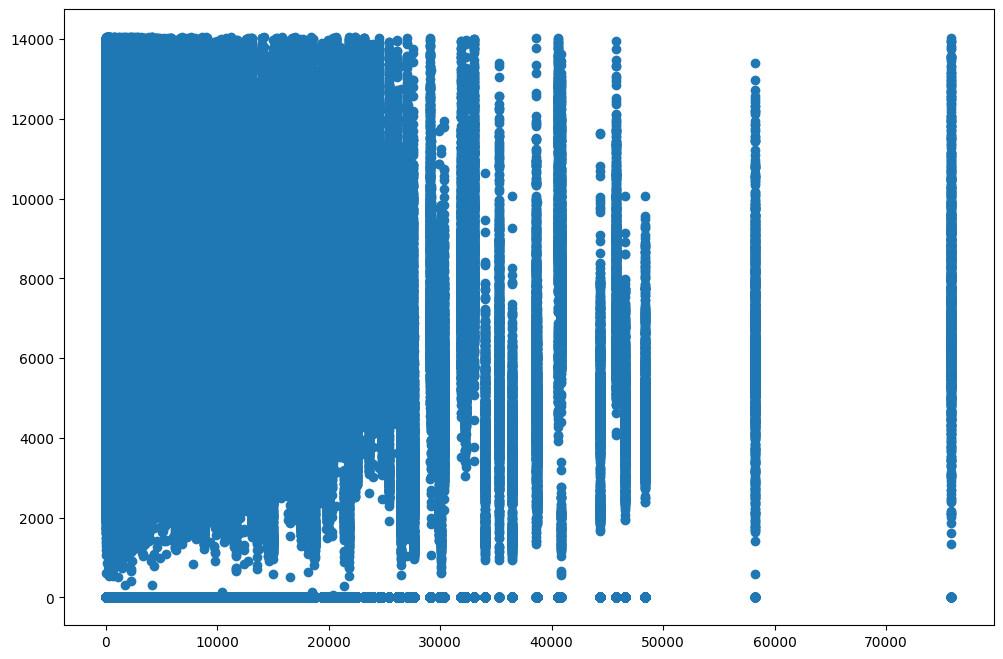

In [51]:
## Relationship between Sales and Promo
fig, ax = plt.subplots(figsize=(12,8))
plt.scatter(y=df_train_merged['Sales'], x=df_train_merged['CompetitionDistance'])

<Axes: >

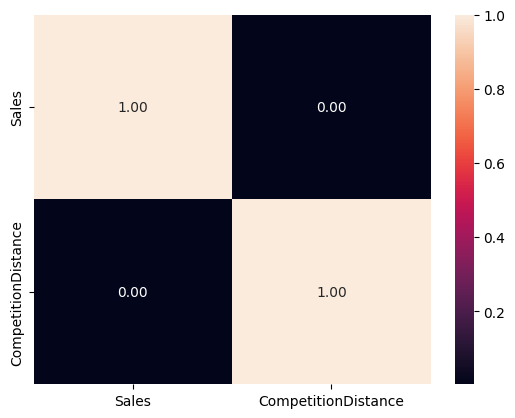

In [52]:
sns.heatmap(df_train_merged[['Sales','CompetitionDistance']].corr(), annot=True, fmt='.2f')

In [67]:
df_train_merged[df_train_merged['CompetitionDistance']== 0]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Period,Transaction_Value
263244,291,d,a,0,0,0,0,UNKNOWN,UNKNOWN,UNKNOWN,5,2015-07-31,10052.0,973.0,1,1,0,1,NaN,10.330935
263245,291,d,a,0,0,0,0,UNKNOWN,UNKNOWN,UNKNOWN,4,2015-07-30,9030.0,883.0,1,1,0,1,NaN,10.226501
263246,291,d,a,0,0,0,0,UNKNOWN,UNKNOWN,UNKNOWN,3,2015-07-29,8204.0,814.0,1,1,0,1,NaN,10.078624
263247,291,d,a,0,0,0,0,UNKNOWN,UNKNOWN,UNKNOWN,2,2015-07-28,10374.0,943.0,1,1,0,1,NaN,11.00106
263248,291,d,a,0,0,0,0,UNKNOWN,UNKNOWN,UNKNOWN,1,2015-07-27,11692.0,1086.0,1,1,0,1,NaN,10.766114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
801517,879,d,a,0,0,0,1,5.0,2013.0,"Feb,May,Aug,Nov",6,2013-01-05,3175.0,303.0,1,0,0,0,After Holiday,10.478548
801518,879,d,a,0,0,0,1,5.0,2013.0,"Feb,May,Aug,Nov",5,2013-01-04,3160.0,343.0,1,0,0,1,After Holiday,9.212828
801519,879,d,a,0,0,0,1,5.0,2013.0,"Feb,May,Aug,Nov",4,2013-01-03,3344.0,332.0,1,0,0,1,After Holiday,10.072289
801520,879,d,a,0,0,0,1,5.0,2013.0,"Feb,May,Aug,Nov",3,2013-01-02,3077.0,326.0,1,0,0,1,After Holiday,9.43865


In [54]:
new_competitors = df_train_merged[df_train_merged['CompetitionDistance'] == 0].copy()
new_competitors 

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Period,Transaction_Value
263244,291,d,a,0,0,0,0,UNKNOWN,UNKNOWN,UNKNOWN,5,2015-07-31,10052.0,973.0,1,1,0,1,NaN,10.330935
263245,291,d,a,0,0,0,0,UNKNOWN,UNKNOWN,UNKNOWN,4,2015-07-30,9030.0,883.0,1,1,0,1,NaN,10.226501
263246,291,d,a,0,0,0,0,UNKNOWN,UNKNOWN,UNKNOWN,3,2015-07-29,8204.0,814.0,1,1,0,1,NaN,10.078624
263247,291,d,a,0,0,0,0,UNKNOWN,UNKNOWN,UNKNOWN,2,2015-07-28,10374.0,943.0,1,1,0,1,NaN,11.00106
263248,291,d,a,0,0,0,0,UNKNOWN,UNKNOWN,UNKNOWN,1,2015-07-27,11692.0,1086.0,1,1,0,1,NaN,10.766114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
801517,879,d,a,0,0,0,1,5.0,2013.0,"Feb,May,Aug,Nov",6,2013-01-05,3175.0,303.0,1,0,0,0,After Holiday,10.478548
801518,879,d,a,0,0,0,1,5.0,2013.0,"Feb,May,Aug,Nov",5,2013-01-04,3160.0,343.0,1,0,0,1,After Holiday,9.212828
801519,879,d,a,0,0,0,1,5.0,2013.0,"Feb,May,Aug,Nov",4,2013-01-03,3344.0,332.0,1,0,0,1,After Holiday,10.072289
801520,879,d,a,0,0,0,1,5.0,2013.0,"Feb,May,Aug,Nov",3,2013-01-02,3077.0,326.0,1,0,0,1,After Holiday,9.43865
